### Oversampling con autoencoder

In [1]:
import pandas as pd
import sys
sys.path.append("../base_lib")
import functions as func

2025-01-16 16:04:56.949010: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-16 16:04:56.950199: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 16:04:56.962827: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 16:04:57.043552: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-16 16:04:58.292521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

#### Dataset originale

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,GENERATION,STEMSIZE,CUPSIZE,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,LUX_01,LUX_CR
BREED,1.000000,0.027166,-0.014028,-0.025418,0.110383,0.139797,0.065465,0.058535,-0.078307,-0.077249,-0.075571,-0.058671,0.038868,-0.032023,-0.036417,-0.058195,-0.017493,0.037387
GENDER_01,0.027166,1.000000,-0.027979,-0.245394,-0.086088,0.055765,0.008949,0.010490,-0.003698,-0.186105,-0.125310,-0.131631,-0.035740,-0.017065,0.018553,0.034807,-0.033912,-0.007585
AGEATSURGERYmo,-0.014028,-0.027979,1.000000,0.223443,0.081939,0.249440,-0.073647,-0.065173,-0.042595,0.055544,0.119718,0.001310,0.087822,0.100177,0.065522,-0.050598,-0.073645,-0.278906
BODYWEIGHTKG,-0.025418,-0.245394,0.223443,1.000000,0.473659,0.347751,-0.098832,-0.101435,-0.145992,0.729568,0.567729,0.508116,0.171239,0.051870,0.023079,-0.024279,0.026042,-0.123078
Taglia,0.110383,-0.086088,0.081939,0.473659,1.000000,0.190115,-0.087625,-0.088802,-0.337549,0.337022,0.315995,0.192690,0.052093,0.008681,0.031939,0.020473,0.003735,-0.121278
BCS,0.139797,0.055765,0.249440,0.347751,0.190115,1.000000,-0.048013,-0.070630,-0.069595,0.121629,0.066432,0.057522,0.147730,0.018362,-0.009160,-0.026356,-0.037610,-0.097834
YEAR,0.065465,0.008949,-0.073647,-0.098832,-0.087625,-0.048013,1.000000,0.962851,0.167868,0.208522,-0.026880,0.384242,-0.145330,0.206113,-0.397424,0.136573,-0.091297,0.258462
GENERATION,0.058535,0.010490,-0.065173,-0.101435,-0.088802,-0.070630,0.962851,1.000000,0.170209,0.209889,0.012168,0.394698,-0.140741,0.190490,-0.417568,0.089661,-0.088929,0.249867
STEMSIZE,-0.078307,-0.003698,-0.042595,-0.145992,-0.337549,-0.069595,0.167868,0.170209,1.000000,-0.128618,-0.155353,-0.009715,-0.029870,0.028605,-0.130769,-0.025681,-0.020564,0.106314
CUPSIZE,-0.077249,-0.186105,0.055544,0.729568,0.337022,0.121629,0.208522,0.209889,-0.128618,1.000000,0.584464,0.845895,0.084650,0.105976,-0.070765,0.031145,0.012870,0.029853


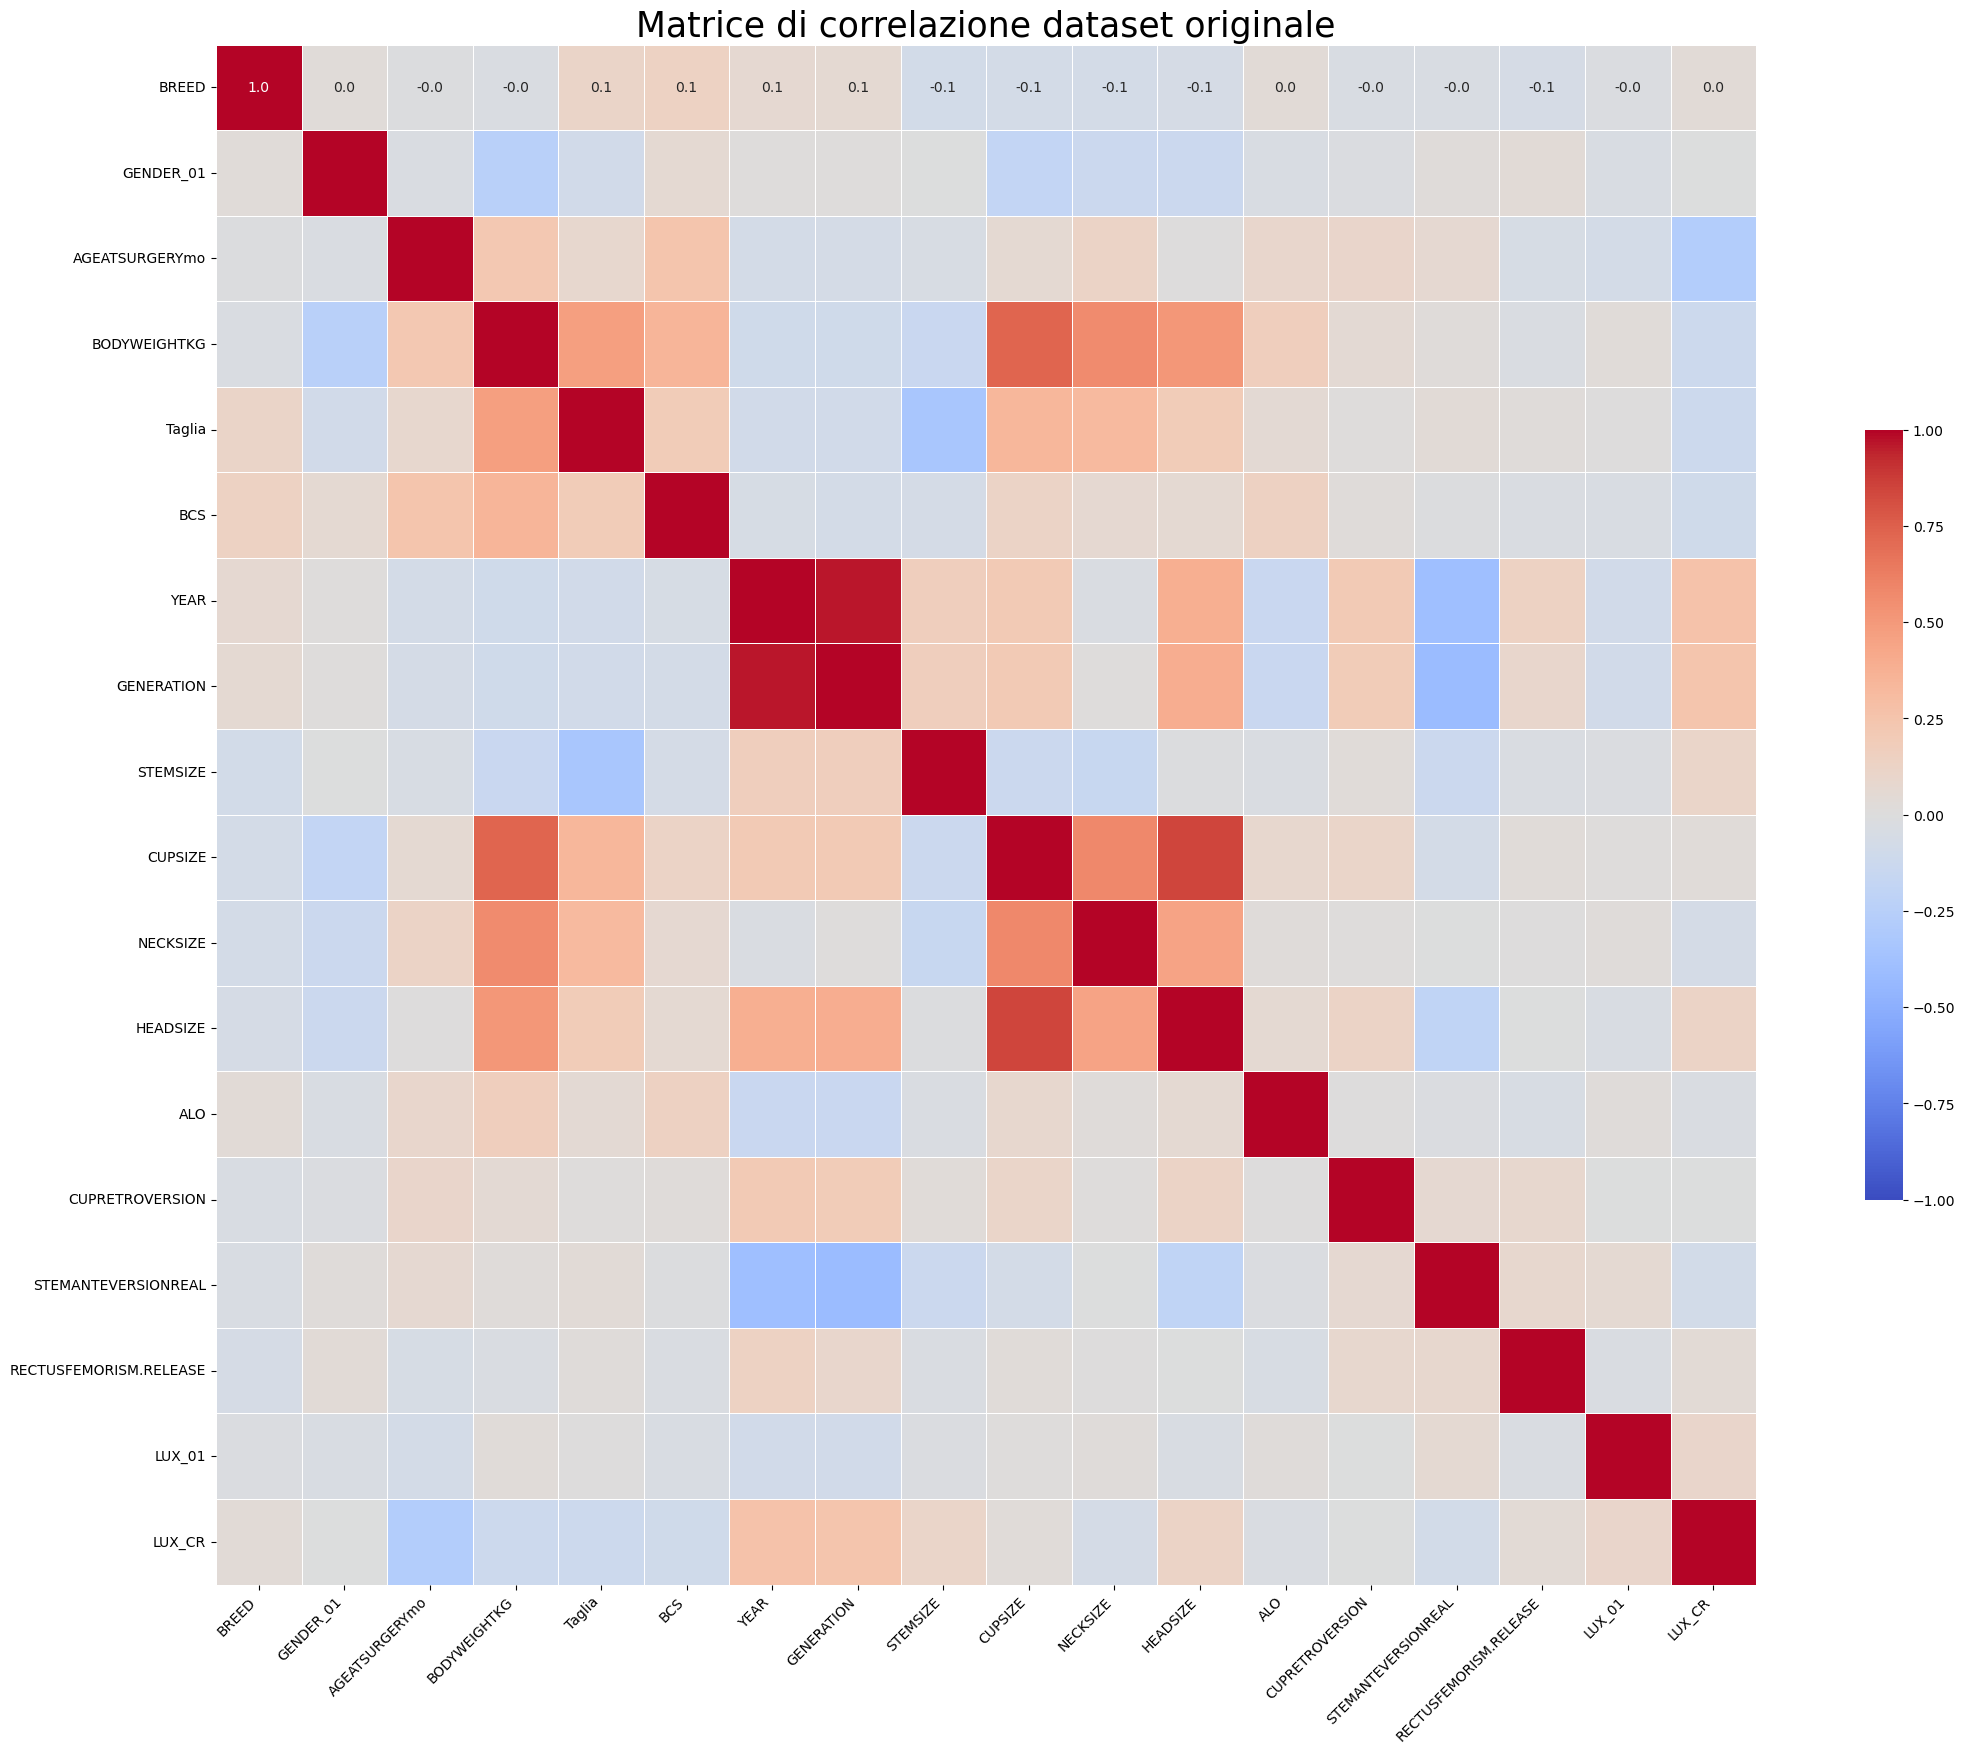

In [2]:
dataset = pd.read_csv("../csv/dataset_original.csv")
dataset = func.drop_cols(dataset)
func.display_corr_matrix(dataset, "Matrice di correlazione dataset originale")

#### Dataset aumentato

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,GENERATION,STEMSIZE,CUPSIZE,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,LUX_01,LUX_CR
BREED,1.000000,0.035294,-0.030775,-0.028876,0.125059,0.155381,0.047507,0.037148,-0.049063,-0.082547,-0.080507,-0.082712,0.087090,-0.009223,-0.044398,-0.038750,-0.037944,0.043801
GENDER_01,0.035294,1.000000,-0.031649,-0.254826,-0.108311,0.068947,0.026186,0.021770,0.041882,-0.197818,-0.135378,-0.128979,-0.001955,-0.017124,-0.001922,0.034215,-0.075400,-0.054842
AGEATSURGERYmo,-0.030775,-0.031649,1.000000,0.173606,0.070017,0.210529,-0.067441,-0.052416,-0.017437,-0.000918,0.096844,-0.017838,0.057717,0.113809,0.075713,-0.031859,-0.176457,-0.297455
BODYWEIGHTKG,-0.028876,-0.254826,0.173606,1.000000,0.474744,0.322173,-0.160699,-0.161584,-0.200499,0.730021,0.565978,0.499333,0.182705,0.015524,0.043129,-0.049634,0.067663,-0.106673
Taglia,0.125059,-0.108311,0.070017,0.474744,1.000000,0.180028,-0.088026,-0.099304,-0.380613,0.339979,0.340192,0.197968,0.069345,0.019602,-0.008826,0.027308,-0.001184,-0.099486
BCS,0.155381,0.068947,0.210529,0.322173,0.180028,1.000000,-0.056398,-0.085400,-0.066129,0.092154,0.051098,0.037240,0.109431,0.003802,-0.015591,-0.058663,-0.083813,-0.142591
YEAR,0.047507,0.026186,-0.067441,-0.160699,-0.088026,-0.056398,1.000000,0.963506,0.186002,0.121063,-0.103204,0.346833,-0.196151,0.197774,-0.399639,0.150205,-0.177072,0.252718
GENERATION,0.037148,0.021770,-0.052416,-0.161584,-0.099304,-0.085400,0.963506,1.000000,0.192927,0.123485,-0.063957,0.356510,-0.193154,0.185318,-0.406171,0.107641,-0.174336,0.239002
STEMSIZE,-0.049063,0.041882,-0.017437,-0.200499,-0.380613,-0.066129,0.186002,0.192927,1.000000,-0.161901,-0.222544,-0.028781,-0.080068,0.055548,-0.132371,-0.030211,-0.036953,0.098320
CUPSIZE,-0.082547,-0.197818,-0.000918,0.730021,0.339979,0.092154,0.121063,0.123485,-0.161901,1.000000,0.564844,0.831914,0.067131,0.039611,-0.026131,-0.001493,0.036455,0.047432


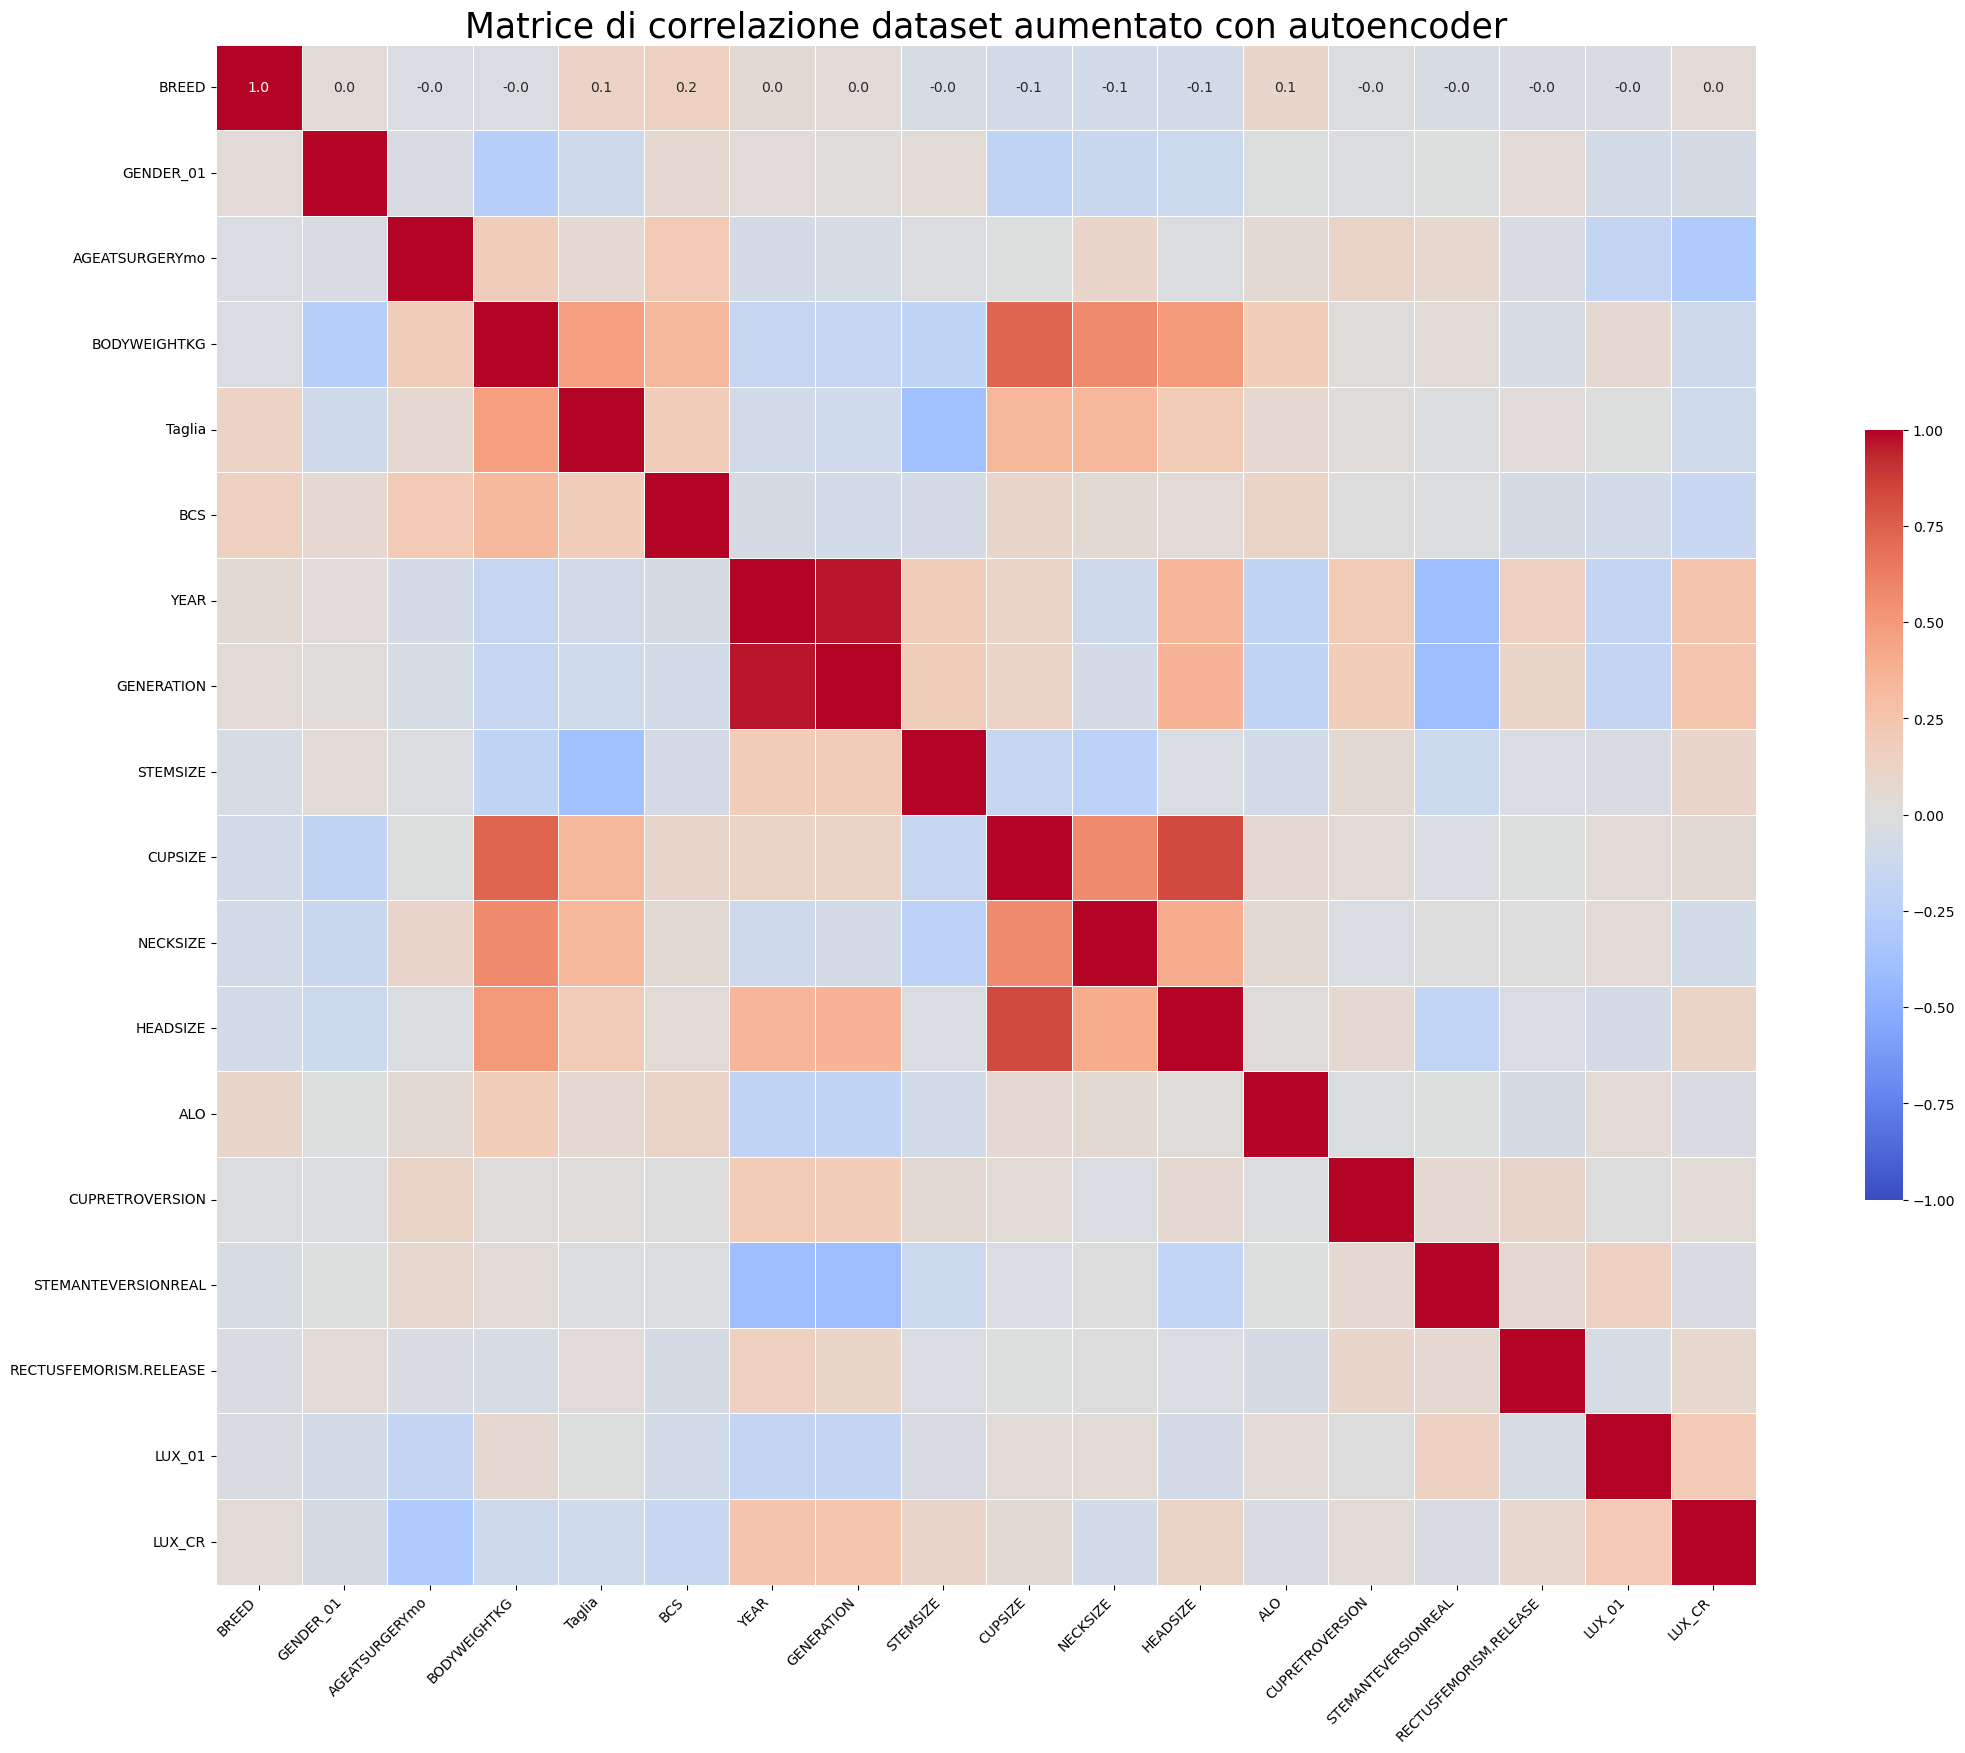

In [6]:
dataset_augmented = pd.read_csv("../csv/dataset_original_autoencoder.csv")
dataset_augmented = dataset_augmented.drop(['Unnamed: 0', 'mse'], axis=1)
func.display_corr_matrix(dataset_augmented, "Matrice di correlazione dataset aumentato con autoencoder")